In [10]:
# Import the machine learning libraries.
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Load MNIST dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
# From sparse label to categorical.
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
# Reshape and normalize input images.
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [14]:
# Network parameters.
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
filters = 64
dropout = 0.3

In [15]:
# Use functional API to build cnn layers.
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
# Image to vector before connecting to dense layer.
y = Flatten()(y)
# Dropout regularization.
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

In [16]:
# Build the model by supplying inputs/outputs.
model = Model(inputs=inputs, outputs=outputs)
# Network model in text.
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [17]:
# Classifier loss, Adam optimizer, classifier accuracy.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
# Train the model with input images and labels.
history = model.fit(x_train,
          y_train,
          validation_data=(x_test, y_test),
          epochs=20,
          batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 75s 160ms/step - loss: 0.2760 - accuracy: 0.9148 - val_loss: 0.0637 - val_accuracy: 0.9787
Epoch 2/20
469/469 [==============================] - 75s 159ms/step - loss: 0.0721 - accuracy: 0.9776 - val_loss: 0.0360 - val_accuracy: 0.9874
Epoch 3/20
469/469 [==============================] - 74s 159ms/step - loss: 0.0500 - accuracy: 0.9839 - val_loss: 0.0299 - val_accuracy: 0.9900
Epoch 4/20
469/469 [==============================] - 75s 159ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0274 - val_accuracy: 0.9913
Epoch 5/20
469/469 [==============================] - 80s 171ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0241 - val_accuracy: 0.9924
Epoch 6/20
469/469 [==============================] - 75s 160ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0257 - val_accuracy: 0.9923
Epoch 7/20
469/469 [==============================] - 75s 160ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0241 - val_ac

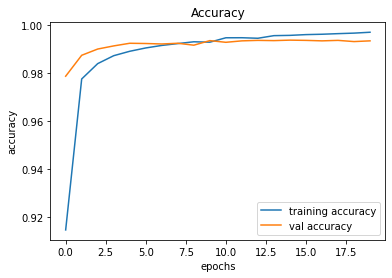

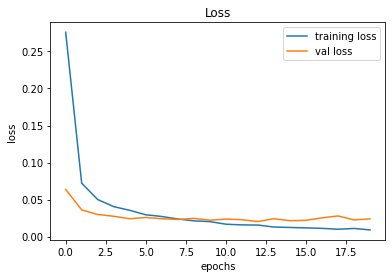

In [19]:
# Plot graphs for accuracy.
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
# model accuracy on test dataset
score = model.evaluate(x_test,
                       y_test,
                       batch_size=batch_size,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.3%
